# Simple, Multiple and Polynomial Regression

## Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("classic")

## Load the data

In [2]:
df = pd.read_csv("../Data/Co2Emissions.csv")

In [3]:
df.head()

,Engine Size,Cylinders,Fuel Consumption Combined,Co2 Emissions
0,2.4,4,33,199
1,3.5,6,26,254
2,3.5,6,26,258
3,3.0,6,31,210
4,2.0,4,29,232


## Check for the missing values

In [4]:
df.isnull().sum()

Engine Size                  0
Cylinders                    0
Fuel Consumption Combined    0
Co2 Emissions                0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Engine Size                927 non-null    float64
 1   Cylinders                  927 non-null    int64  
 2   Fuel Consumption Combined  927 non-null    int64  
 3   Co2 Emissions              927 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 29.1 KB


## Plot the histogram

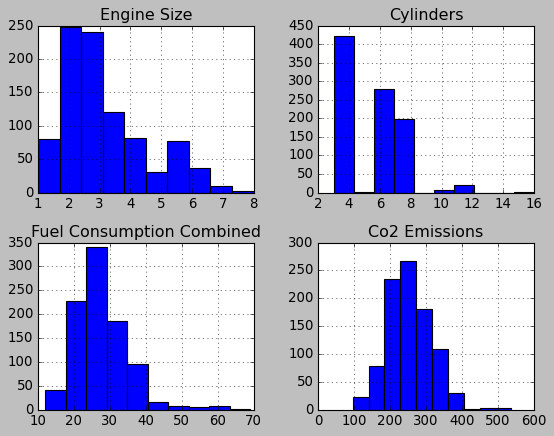

In [6]:
df.hist()
plt.show()

## Plot the scatterplot

In [7]:
def plot_scatter(x, y, data, ax = None):
    if ax != None:
        ax.locator_params(nbins = 4)
        ax.scatter(x = x, y = y, data = data)
        ax.set_xlabel(str(x), fontsize = 14)
        ax.set_ylabel(str(y), fontsize = 14)
        ax.set_title(str(x) +" "+ "VS" +" "+str(y), fontsize = 14)
    else:
        plt.scatter(x = x, y = y, data = data)
        plt.xlabel(str(x))
        plt.ylabel(str(y))
        plt.title(str(x) +" "+ "VS" +" "+str(y))

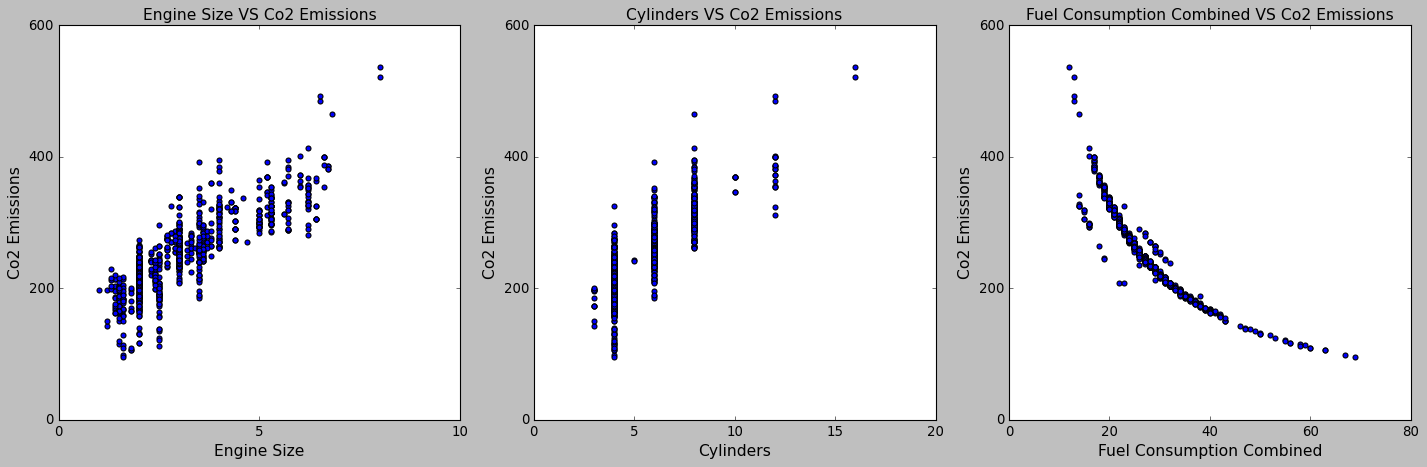

In [8]:
fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3, figsize = (18, 6))
plot_scatter(x = "Engine Size", y = "Co2 Emissions", data = df, ax = ax1)
plot_scatter(x = "Cylinders", y = "Co2 Emissions", data = df, ax = ax2)
plot_scatter(x = "Fuel Consumption Combined", y = "Co2 Emissions", data = df, ax = ax3)
plt.tight_layout()

## Split the dataset

In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size = 0.90, random_state = 42, shuffle = True)

## Split the dependent and independent variables

In [10]:
X = train.iloc[:, 0:1].values
y = train.iloc[:, -1].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, shuffle = True)

## Simple linear regression
* Training a regression model using single dependent and independent variable
    * X:"Engine Size"
    * y:"Co2 Emissions"

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()

In [14]:
model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error

In [17]:
print(mean_absolute_error(y_test, y_pred))

22.28094703432097


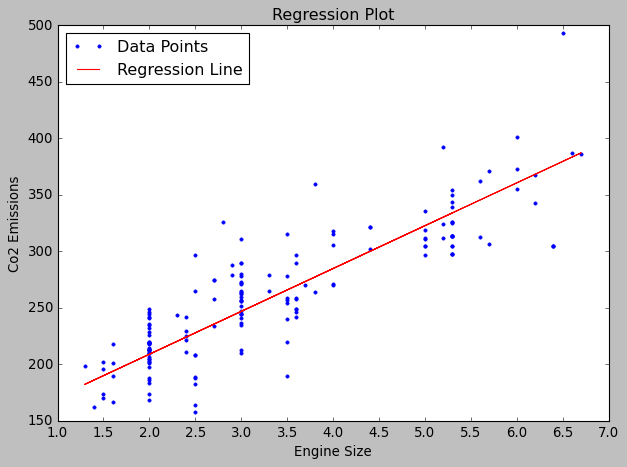

In [18]:
plt.locator_params(nbins = 14)
plt.plot(X_test, y_test, "b.", label = "Data Points")
plt.plot(X_test, y_pred, "r-", label = "Regression Line")
plt.title("Regression Plot")
plt.xlabel("Engine Size")
plt.ylabel("Co2 Emissions")
plt.legend(loc = 2)
plt.tight_layout()

## Multiple linear regression
* Training model using two features
    * X : "Engine Size" and "Cylinders"
    * y : "Co2 Emissions"

In [21]:
X = train.iloc[:, 0:-2].values
y = train.iloc[:, -1].values

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, shuffle = True)

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [25]:
print(mean_absolute_error(y_test, y_pred))

21.614580535348292


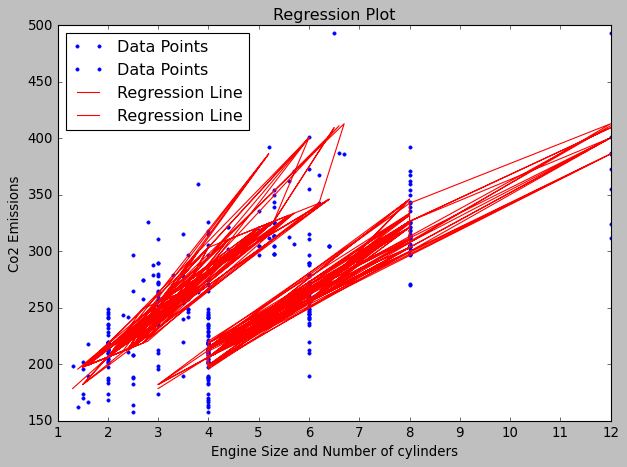

In [27]:
plt.locator_params(nbins = 14)
plt.plot(X_test, y_test, "b.", label = "Data Points")
plt.plot(X_test, y_pred, "r-", label = "Regression Line")
plt.title("Regression Plot")
plt.xlabel("Engine Size and Number of cylinders")
plt.ylabel("Co2 Emissions")
plt.legend(loc = 2)
plt.tight_layout()

## Plynomial regression